# PLACEMENT PREDICTION MODEL

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Reading the dataset

In [2]:
data = pd.read_csv('placed.csv')

In [3]:
data.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,skill1,skill2,skill3,skill4,skill5
0,M,63.00,Central,60.0,Central,Commerce,57.0,Comm&Mgmt,Yes,78.00,Mkt&Fin,54.55,Placed,204000.0,Buisness Knowledge,Critical Thinking,Data Analysis,Financial reporting,Analytical ability
1,M,73.00,Central,78.0,Central,Science,73.0,Sci&Tech,Yes,85.00,Mkt&HR,65.83,Placed,240000.0,Programming Language,Hardware Knowlege,Problem solving,Performance management,Teamwork and collaboration
2,F,69.70,Central,47.0,Central,Commerce,72.7,Sci&Tech,No,79.00,Mkt&HR,59.24,Not Placed,NaN,Programming Language,Hardware Knowlege,Problem solving,Performance management,Teamwork and collaboration
3,M,61.08,Others,50.0,Others,Science,54.0,Sci&Tech,No,71.00,Mkt&Fin,65.69,Not Placed,NaN,Programming Language,Hardware Knowlege,Problem solving,Financial reporting,Analytical ability
4,M,62.00,Central,47.0,Central,Commerce,50.0,Comm&Mgmt,No,76.00,Mkt&HR,54.96,Not Placed,NaN,Buisness Knowledge,Critical Thinking,Data Analysis,Performance management,Teamwork and collaboration
5,M,76.00,Central,80.0,Central,Science,78.0,Sci&Tech,Yes,97.00,Mkt&HR,70.48,Placed,276000.0,Programming Language,Hardware Knowlege,Problem solving,Performance management,Teamwork and collaboration
6,M,63.00,Central,67.0,Central,Commerce,74.0,Comm&Mgmt,No,82.00,Mkt&Fin,60.44,Not Placed,NaN,Buisness Knowledge,Critical Thinking,Data Analysis,Financial reporting,Analytical ability
7,F,50.00,Others,37.0,Others,Arts,52.0,Others,No,65.00,Mkt&HR,56.11,Not Placed,NaN,Creative thinking,Composition skill,Knowledge of art,Performance management,Teamwork and collaboration
8,M,72.00,Others,63.0,Others,Science,77.5,Sci&Tech,Yes,78.00,Mkt&Fin,54.48,Placed,250000.0,Programming Language,Hardware Knowlege,Problem solving,Financial reporting,Analytical ability
9,F,83.96,Others,53.0,Others,Science,91.0,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed,260000.0,Programming Language,Hardware Knowlege,Problem solving,Performance management,Teamwork and collaboration


In [4]:
data= shuffle(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 1435 to 314
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          1697 non-null   object 
 1   ssc_p           1697 non-null   float64
 2   ssc_b           1697 non-null   object 
 3   hsc_p           1697 non-null   float64
 4   hsc_b           1697 non-null   object 
 5   hsc_s           1697 non-null   object 
 6   degree_p        1697 non-null   float64
 7   degree_t        1697 non-null   object 
 8   workex          1697 non-null   object 
 9   etest_p         1697 non-null   float64
 10  specialisation  1697 non-null   object 
 11  mba_p           1697 non-null   float64
 12  status          1697 non-null   object 
 13  salary          1113 non-null   float64
 14  skill1          1697 non-null   object 
 15  skill2          1697 non-null   object 
 16  skill3          1697 non-null   object 
 17  skill4          1697 non-null  

In [6]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1113.000000
mean,66.587077,65.613147,66.135109,72.067560,62.275362,287086.404313
std,10.744934,11.464225,7.737823,13.141013,6.138475,94420.741033
min,40.890000,37.000000,50.000000,50.000000,51.210000,168.000000
25%,60.000000,60.000000,60.000000,60.000000,57.550000,240000.000000
50%,67.000000,64.800000,65.600000,70.000000,62.210000,265000.000000
75%,74.000000,73.000000,72.000000,84.000000,66.530000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# Checking for null values

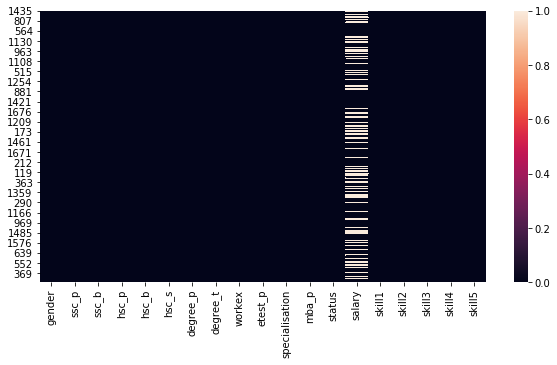

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())

# Missing values replacement

In [8]:
data['salary']=data['salary'].fillna(data['salary'].mean())

# After missing value replacement

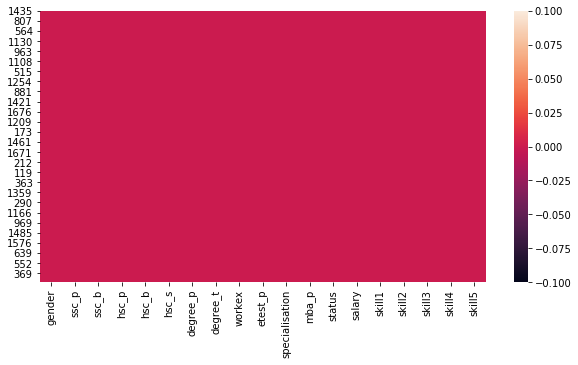

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())

#    Data transformation

In [10]:
le = preprocessing.LabelEncoder()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 1435 to 314
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          1697 non-null   object 
 1   ssc_p           1697 non-null   float64
 2   ssc_b           1697 non-null   object 
 3   hsc_p           1697 non-null   float64
 4   hsc_b           1697 non-null   object 
 5   hsc_s           1697 non-null   object 
 6   degree_p        1697 non-null   float64
 7   degree_t        1697 non-null   object 
 8   workex          1697 non-null   object 
 9   etest_p         1697 non-null   float64
 10  specialisation  1697 non-null   object 
 11  mba_p           1697 non-null   float64
 12  status          1697 non-null   object 
 13  salary          1697 non-null   float64
 14  skill1          1697 non-null   object 
 15  skill2          1697 non-null   object 
 16  skill3          1697 non-null   object 
 17  skill4          1697 non-null  

In [12]:
data['gender']=le.fit_transform(data['gender'])
data['degree_t']=le.fit_transform(data['degree_t'])
data['workex']=le.fit_transform(data['workex'])
data['specialisation']=le.fit_transform(data['specialisation'])
data['skill1']=le.fit_transform(data['skill1'])
data['skill2']=le.fit_transform(data['skill2'])
data['skill3']=le.fit_transform(data['skill3'])
data['skill4']=le.fit_transform(data['skill4'])
data['skill5']=le.fit_transform(data['skill5'])
data['status']=le.fit_transform(data['status'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 1435 to 314
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          1697 non-null   int32  
 1   ssc_p           1697 non-null   float64
 2   ssc_b           1697 non-null   object 
 3   hsc_p           1697 non-null   float64
 4   hsc_b           1697 non-null   object 
 5   hsc_s           1697 non-null   object 
 6   degree_p        1697 non-null   float64
 7   degree_t        1697 non-null   int32  
 8   workex          1697 non-null   int32  
 9   etest_p         1697 non-null   float64
 10  specialisation  1697 non-null   int32  
 11  mba_p           1697 non-null   float64
 12  status          1697 non-null   int32  
 13  salary          1697 non-null   float64
 14  skill1          1697 non-null   int32  
 15  skill2          1697 non-null   int32  
 16  skill3          1697 non-null   int32  
 17  skill4          1697 non-null  

# Feature Selection

In [14]:
x=data[['gender','ssc_p','hsc_p','degree_p','degree_t','etest_p','specialisation','mba_p','skill1','skill2',
        'skill3','skill4','skill5']]
y=data['status']

# Spliting the dataset

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

# NAIVE BAYES

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
gnb = GaussianNB()

# Training the data

In [18]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# Predictions

In [19]:
predictions = gnb.predict(x_test)

# Classification report

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       173
           1       0.87      0.80      0.83       337

    accuracy                           0.79       510
   macro avg       0.77      0.79      0.77       510
weighted avg       0.80      0.79      0.79       510



# Confusion matrix

In [21]:
print(confusion_matrix(y_test,predictions))

[[134  39]
 [ 68 269]]


# Accuracy of training and testing set

In [22]:
tr1=gnb.score(x_train,y_train)

In [23]:
t1=gnb.score(x_test,y_test)

# Precision, recall and f1-score

In [24]:
p1 = precision_score(y_test,predictions)

In [25]:
f1 = f1_score(y_test,predictions)

In [26]:
r1 = recall_score(y_test,predictions)

# LOGISTIC REGRESSION 

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()

# Training the model

In [29]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Testing the model

In [30]:
prediction =logmodel.predict(x_test)

# Classification report

In [31]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       173
           1       0.91      0.91      0.91       337

    accuracy                           0.87       510
   macro avg       0.86      0.86      0.86       510
weighted avg       0.87      0.87      0.87       510



# Confusion matrix

In [32]:
print(confusion_matrix(y_test,prediction))

[[141  32]
 [ 32 305]]


# Accuracy of training set

In [33]:
tr2=logmodel.score(x_train,y_train)

# Accuracy of testing set

In [34]:
t2=logmodel.score(x_test,y_test)

# Precision, recall and F1-score

In [35]:
p2=precision_score(y_test,prediction)

In [36]:
f2=f1_score(y_test,prediction)

In [37]:
r2 = recall_score(y_test,prediction)

# K nearest Neighbour

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)

# Training the model

In [40]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions

In [41]:
predict=knn.predict(x_test)

# Classification report

In [42]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       337

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



# Confusion matrix

In [43]:
print(confusion_matrix(y_test,predict))

[[173   0]
 [  0 337]]


# Accuracy of training and testing set

In [44]:
tr3=knn.score(x_train,y_train)

In [45]:
t3=knn.score(x_test,y_test)

# Precision, recall and F1-score

In [46]:
p3=precision_score(y_test,predict)

In [47]:
f3=f1_score(y_test,predict)

In [48]:
r3=recall_score(y_test,predict)

# Checking for optimum n_neighbour value

In [49]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

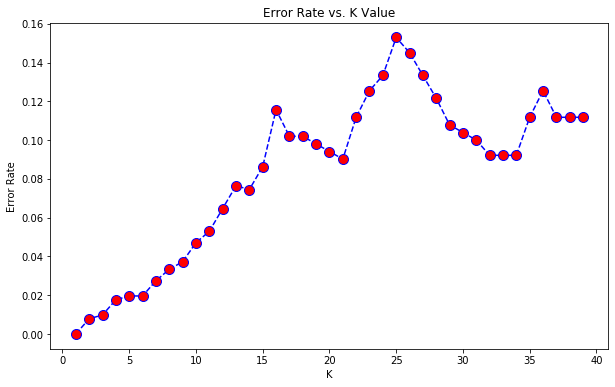

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Support vector machine

In [51]:
from sklearn.svm import SVC

In [52]:
svc=SVC()

# Training the model

In [53]:
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predictions

In [54]:
predt = svc.predict(x_test)

# Classification report

In [55]:
print(classification_report(y_test,predt))

              precision    recall  f1-score   support

           0       0.86      0.66      0.75       173
           1       0.84      0.94      0.89       337

    accuracy                           0.85       510
   macro avg       0.85      0.80      0.82       510
weighted avg       0.85      0.85      0.84       510



# Confusion matrix

In [56]:
print(confusion_matrix(y_test,predt))

[[114  59]
 [ 19 318]]


# Accuracy of training and testing set 

In [57]:
svc.score(x_train,y_train)

0.823083403538332

In [58]:
svc.score(x_test,y_test)

0.8470588235294118

# Checking for different parameters

In [59]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

# Training the model

In [62]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.727, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.752, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.768, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.759, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.759, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.748, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.761, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.768, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.768, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.945, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.929, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.895, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.899, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.886, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.899, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.828, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.895, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [63]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [64]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# Predictions

In [65]:
grid_predictions = grid.predict(x_test)

# Classification report

In [66]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       173
           1       0.99      1.00      0.99       337

    accuracy                           0.99       510
   macro avg       0.99      0.99      0.99       510
weighted avg       0.99      0.99      0.99       510



# Confusion matrix

In [67]:
print(confusion_matrix(y_test,grid_predictions))

[[169   4]
 [  0 337]]


# Accuracy of training and testing set

In [68]:
tr4=grid.score(x_train,y_train)

In [69]:
t4=grid.score(x_test,y_test)

# Precision, recall and F1-score

In [70]:
p4 = precision_score(y_test,grid_predictions)

In [71]:
f4=f1_score(y_test,grid_predictions)

In [72]:
r4 =recall_score(y_test,grid_predictions)

# Result analysis

Comparing the algorithms

# Precision graph

In [73]:
a1=['Naive bayes','Logistic Regression','K nearest neighbour','Support Vector machine']
b1=[p1,p2,p3,p4]

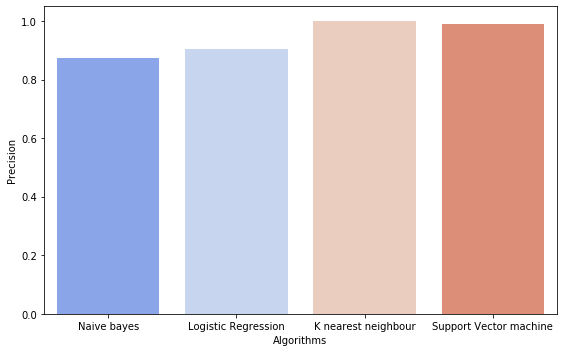

In [74]:
plt.figure(figsize=(8,5))
sns.barplot(x=a1,y=b1,palette='coolwarm')
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.tight_layout()
plt.savefig('r2.png')

# Recall graph

In [75]:
a2=['Naive bayes','Logistic Regression','K nearest neighbour','Support Vector machine']
b2=[r1,r2,r3,r4]

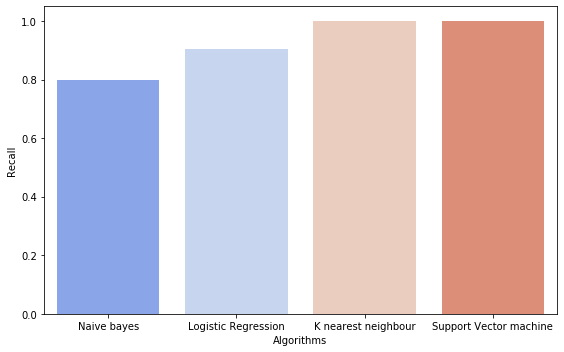

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(x=a2,y=b2,palette='coolwarm')
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.tight_layout()
plt.savefig('r3.png')

# F1-score graph

In [77]:
a3=['Naive bayes','Logistic Regression','K nearest neighbour','Support Vector machine']
b3=[f1,f2,f3,f4]

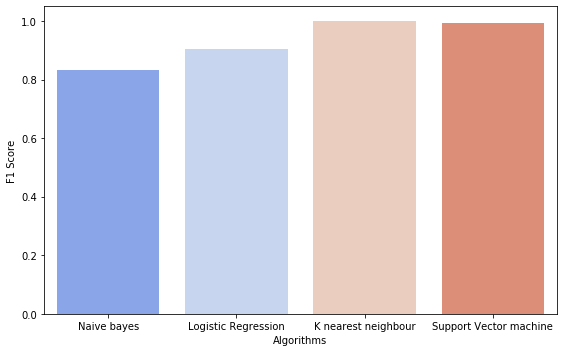

In [78]:
plt.figure(figsize=(8,5))
sns.barplot(x=a3,y=b3,palette='coolwarm')
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.savefig('r4.png')


# Accuracy of training set

In [79]:
algo=['Naive bayes','Logistic Regression','K nearest neighbour','Support Vector machine']
tr=[tr1,tr2,tr3,tr4]

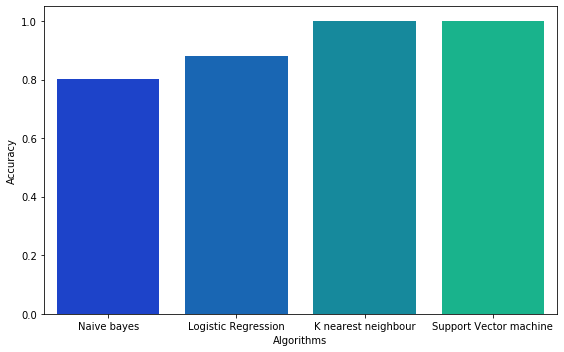

In [80]:
plt.figure(figsize=(8,5))
sns.barplot(x=algo,y=tr,palette='winter')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('r5.png')

# Accuracy of testing set

In [81]:
algo1=['Naive bayes','Logistic Regression','K nearest neighbour','Support Vector machine']
t1=[t1,t2,t3,t4]

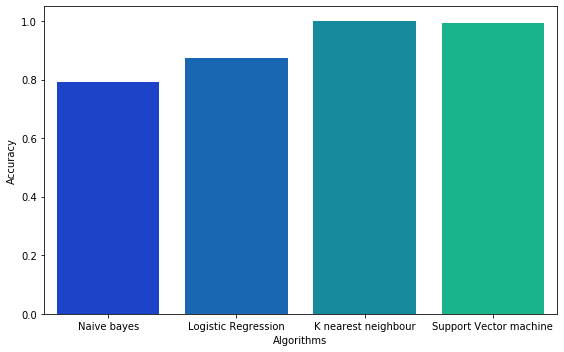

In [82]:
plt.figure(figsize=(8,5))
sns.barplot(x=algo1,y=t1,palette='winter')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('r6.png')


# Overall Accuracy

In [83]:
a=['Naive bayes','Logistic Regression','K nearest neighbour','Support Vector machine']
b=[81,89,94,86]

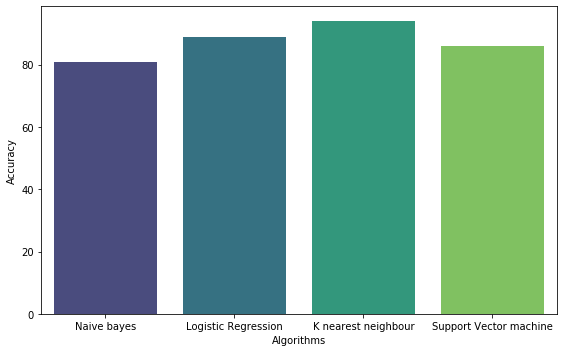

In [84]:
plt.figure(figsize=(8,5))
sns.barplot(x=a,y=b,palette='viridis')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('r1.png')

From above graphs, K nearest neighbour has highest accuracy for training and testing and for precision, recall and f1-score for n-neighbour value 1.
       

Hence comparing all the algorithms K nearest neighbour is optimum for this classification problem.